https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud  --> dataset link
do smotting

In [28]:
from imblearn.over_sampling import RandomOverSampler, ADASYN
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, ParameterGrid, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn import metrics




import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**the data is independent hence has to be correlated and strandadized !!**
- the data has no null value
- 31 independent variables

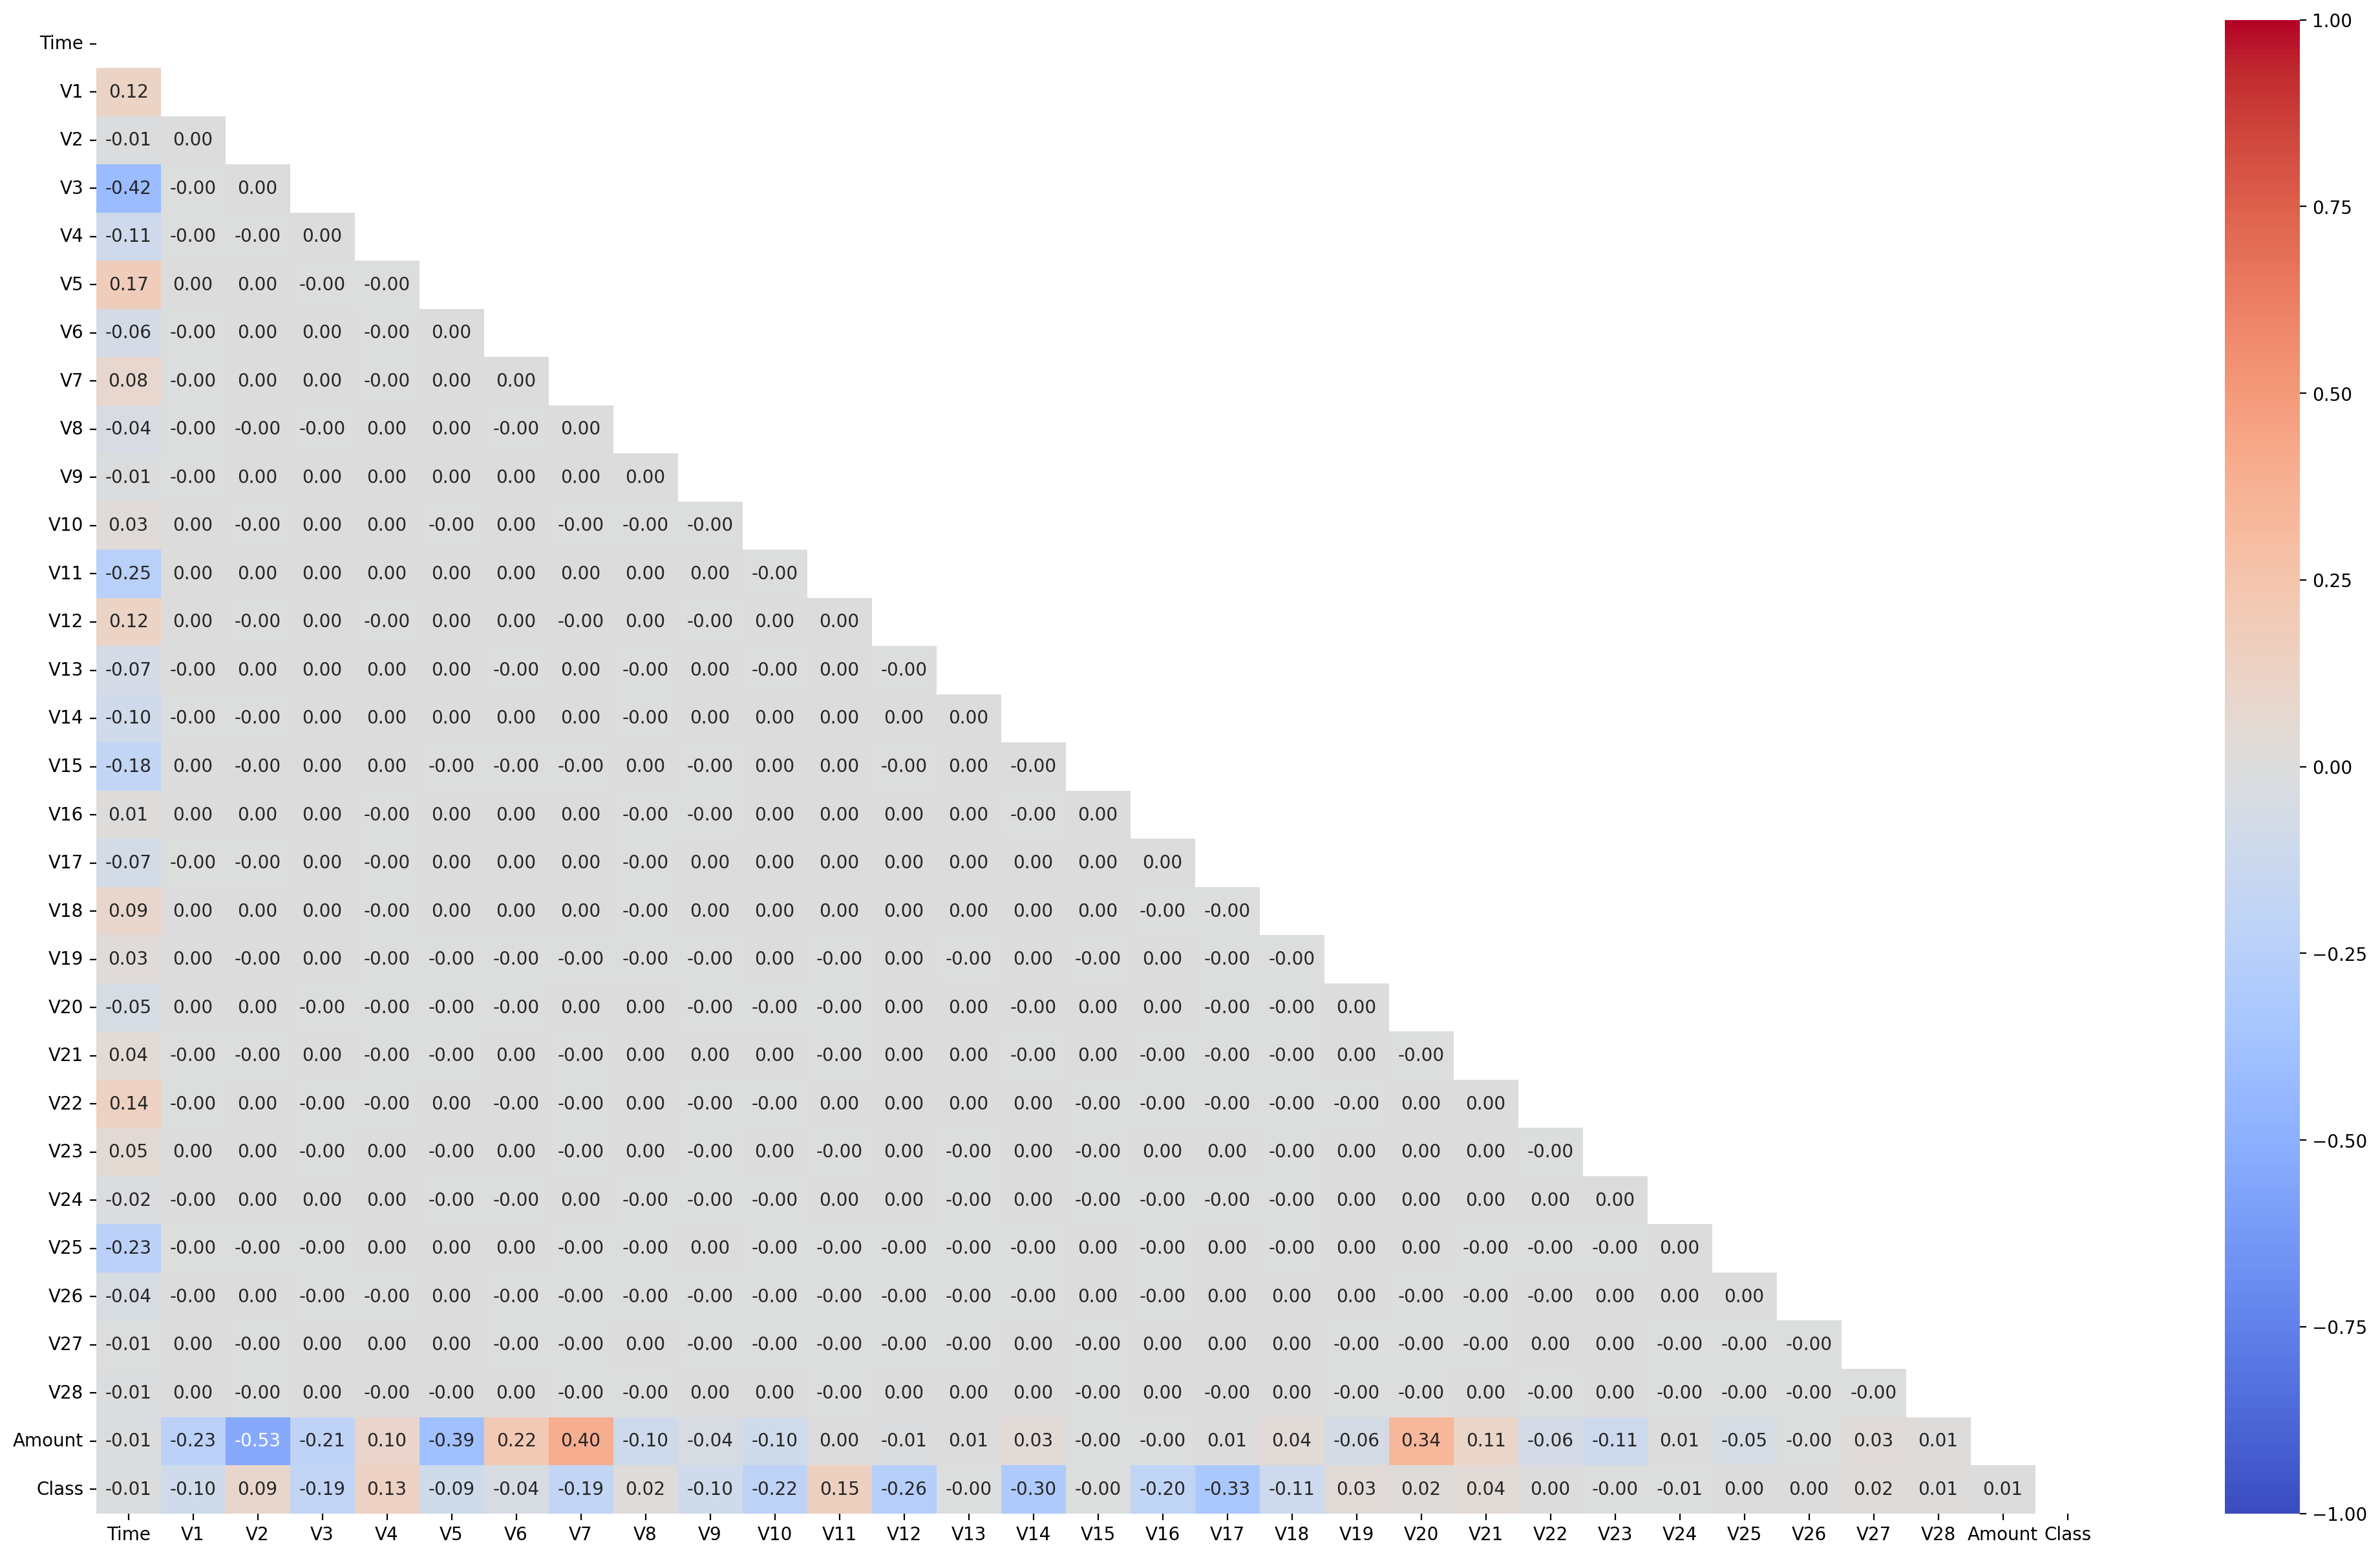

In [ ]:
# Creating a correlation map
mask = np.triu(df.corr())
plt.figure(figsize=(25, 15), dpi=200)
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           fmt='.2f',
           mask=mask)
plt.show(block=False)

- The heatmap shows that most of the independent variables (V1, V2, ... V28) have very low correlation with each other.
- The heatmap reveals that some features, such as 'V17', 'V14', 'V12', and 'V10', show a moderate negative correlation with the 'Class' variable. This suggests that lower values of these features might be associated with fraudulent transactions. Conversely, 'V11' and 'V4' exhibit a moderate positive correlation with 'Class', indicating higher values could be indicative of fraud.


In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
classes

,count
Class,
0,284315
1,492


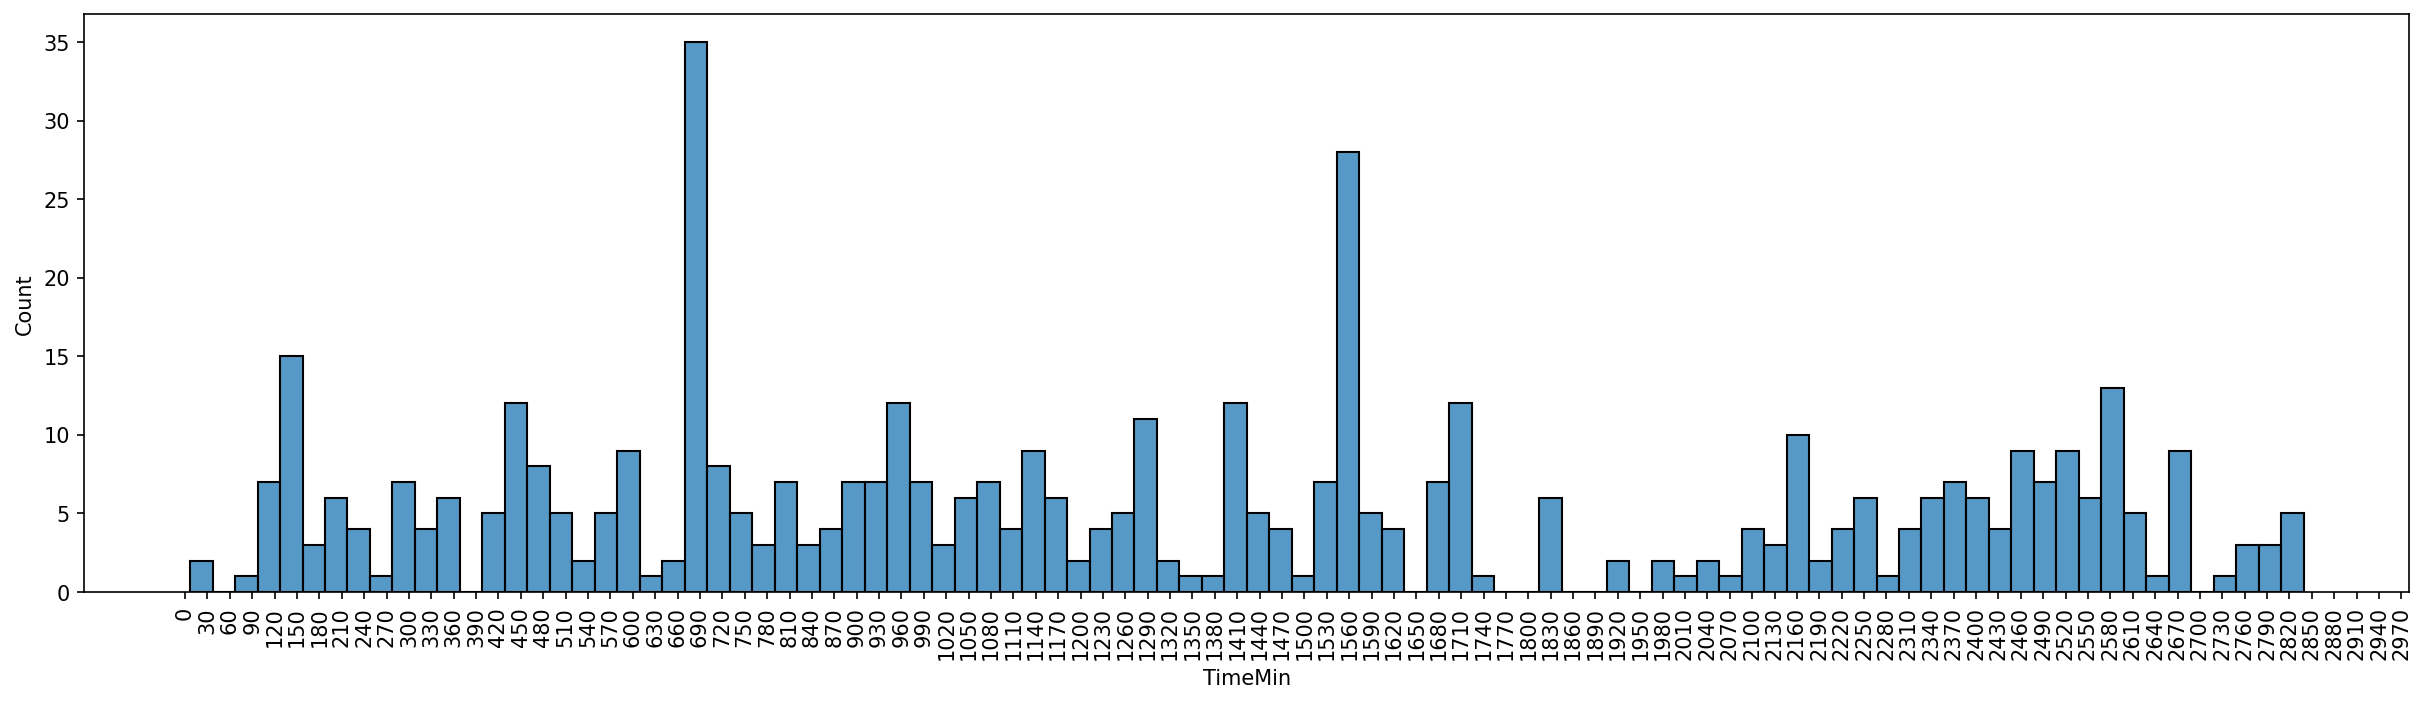

In [ ]:
df['TimeMin'] = df['Time'] / 60
df['TimeHour'] = df['Time'] / 60**2
plt.figure(figsize=(20, 5), dpi=150)
sns.histplot(df[df.Class==1].TimeMin, binwidth=30)
plt.xticks(range(0, 3000, 30), range(0, 3000, 30), rotation=90)
plt.show(block=False)

highest fradulant happens at time period 660 - 690 ,
second highest is at 1530 - 1560 and no frauds occur at tp 30-60, 16

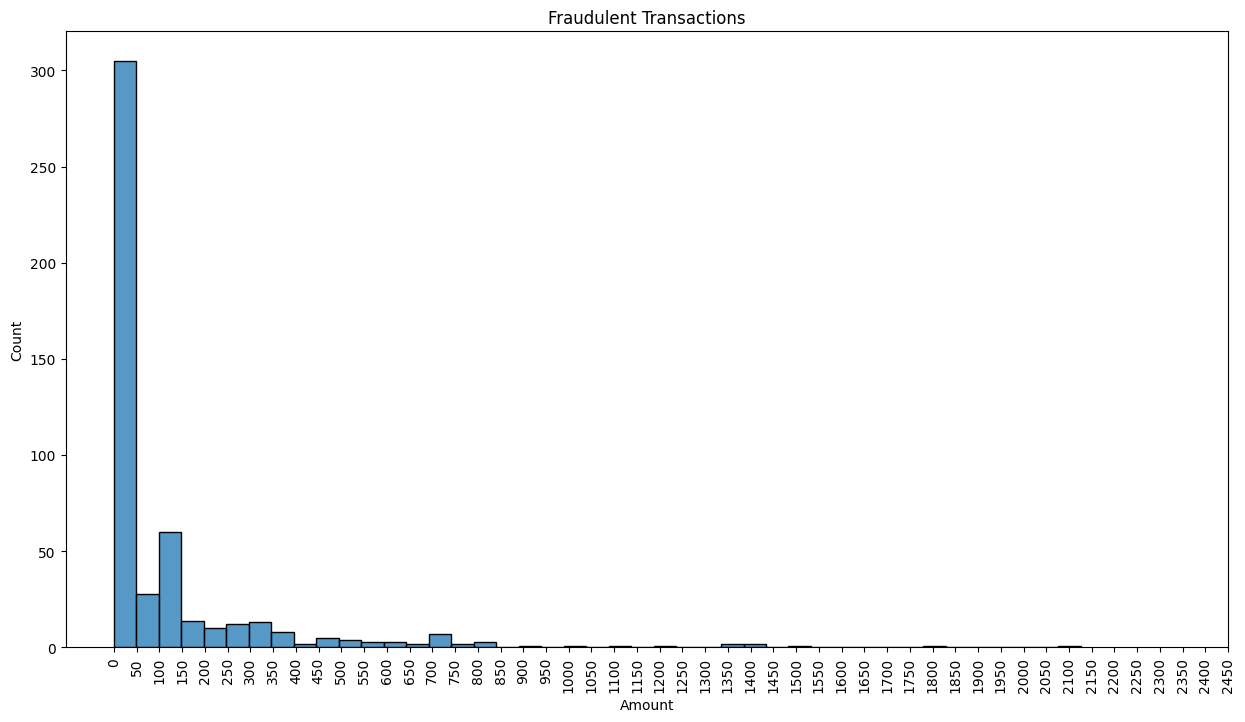

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("Fraudulent Transactions")
sns.histplot(df[df.Class==1].Amount, binwidth=50)
plt.xticks(range(0, 2500, 50), range(0, 2500, 50), rotation=90)
plt.show()

highest transcation happens when the amount is 0 to 50

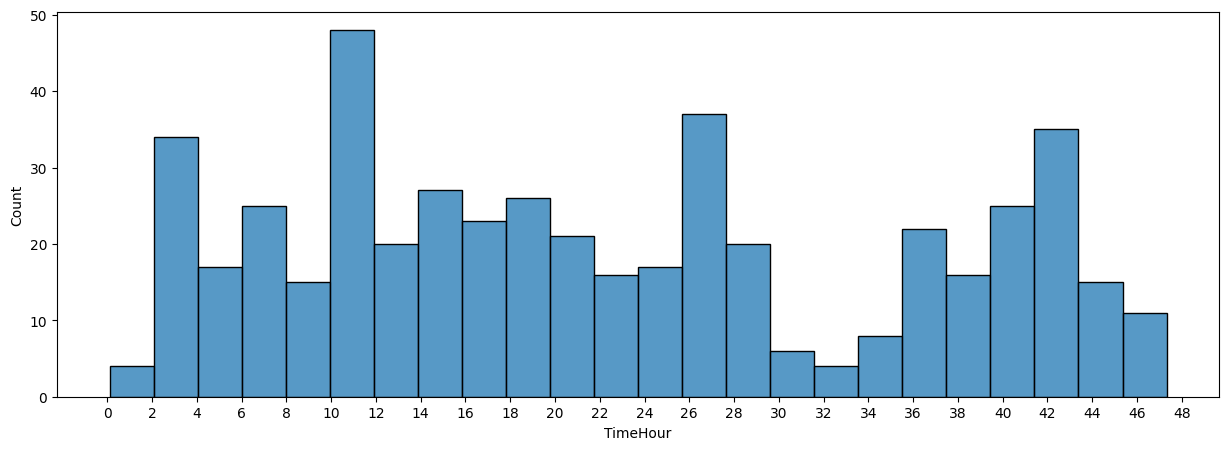

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(df[df.Class==1].TimeHour, binwidth=2)
plt.xticks(range(0, 50, 2), range(0, 50, 2))
plt.show(block=False)

In [ ]:
df[df.Class==1].Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


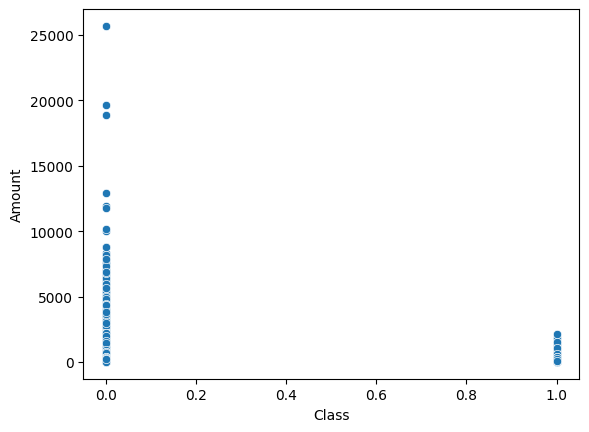

In [ ]:
sns.scatterplot(data=df, x='Class', y='Amount')
plt.show()

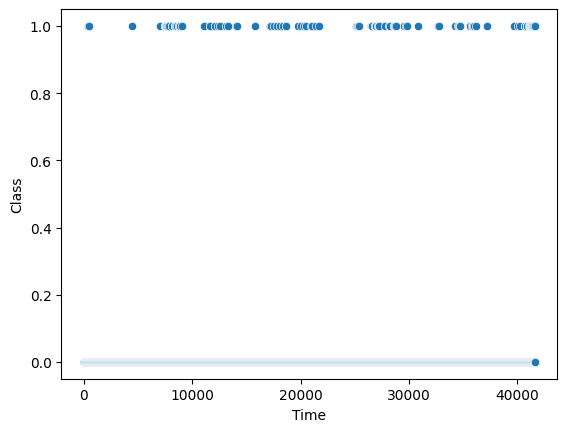

In [ ]:

sns.scatterplot(data=df, x='Time', y='Class')
plt.show()

In [ ]:
df.drop(['Time', 'TimeMin', 'TimeHour'], axis=1, inplace=True)

In [ ]:
# Train test split
y = df.pop("Class")
X = df

# Using stratify=y for splitting data into stratified fashion
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)

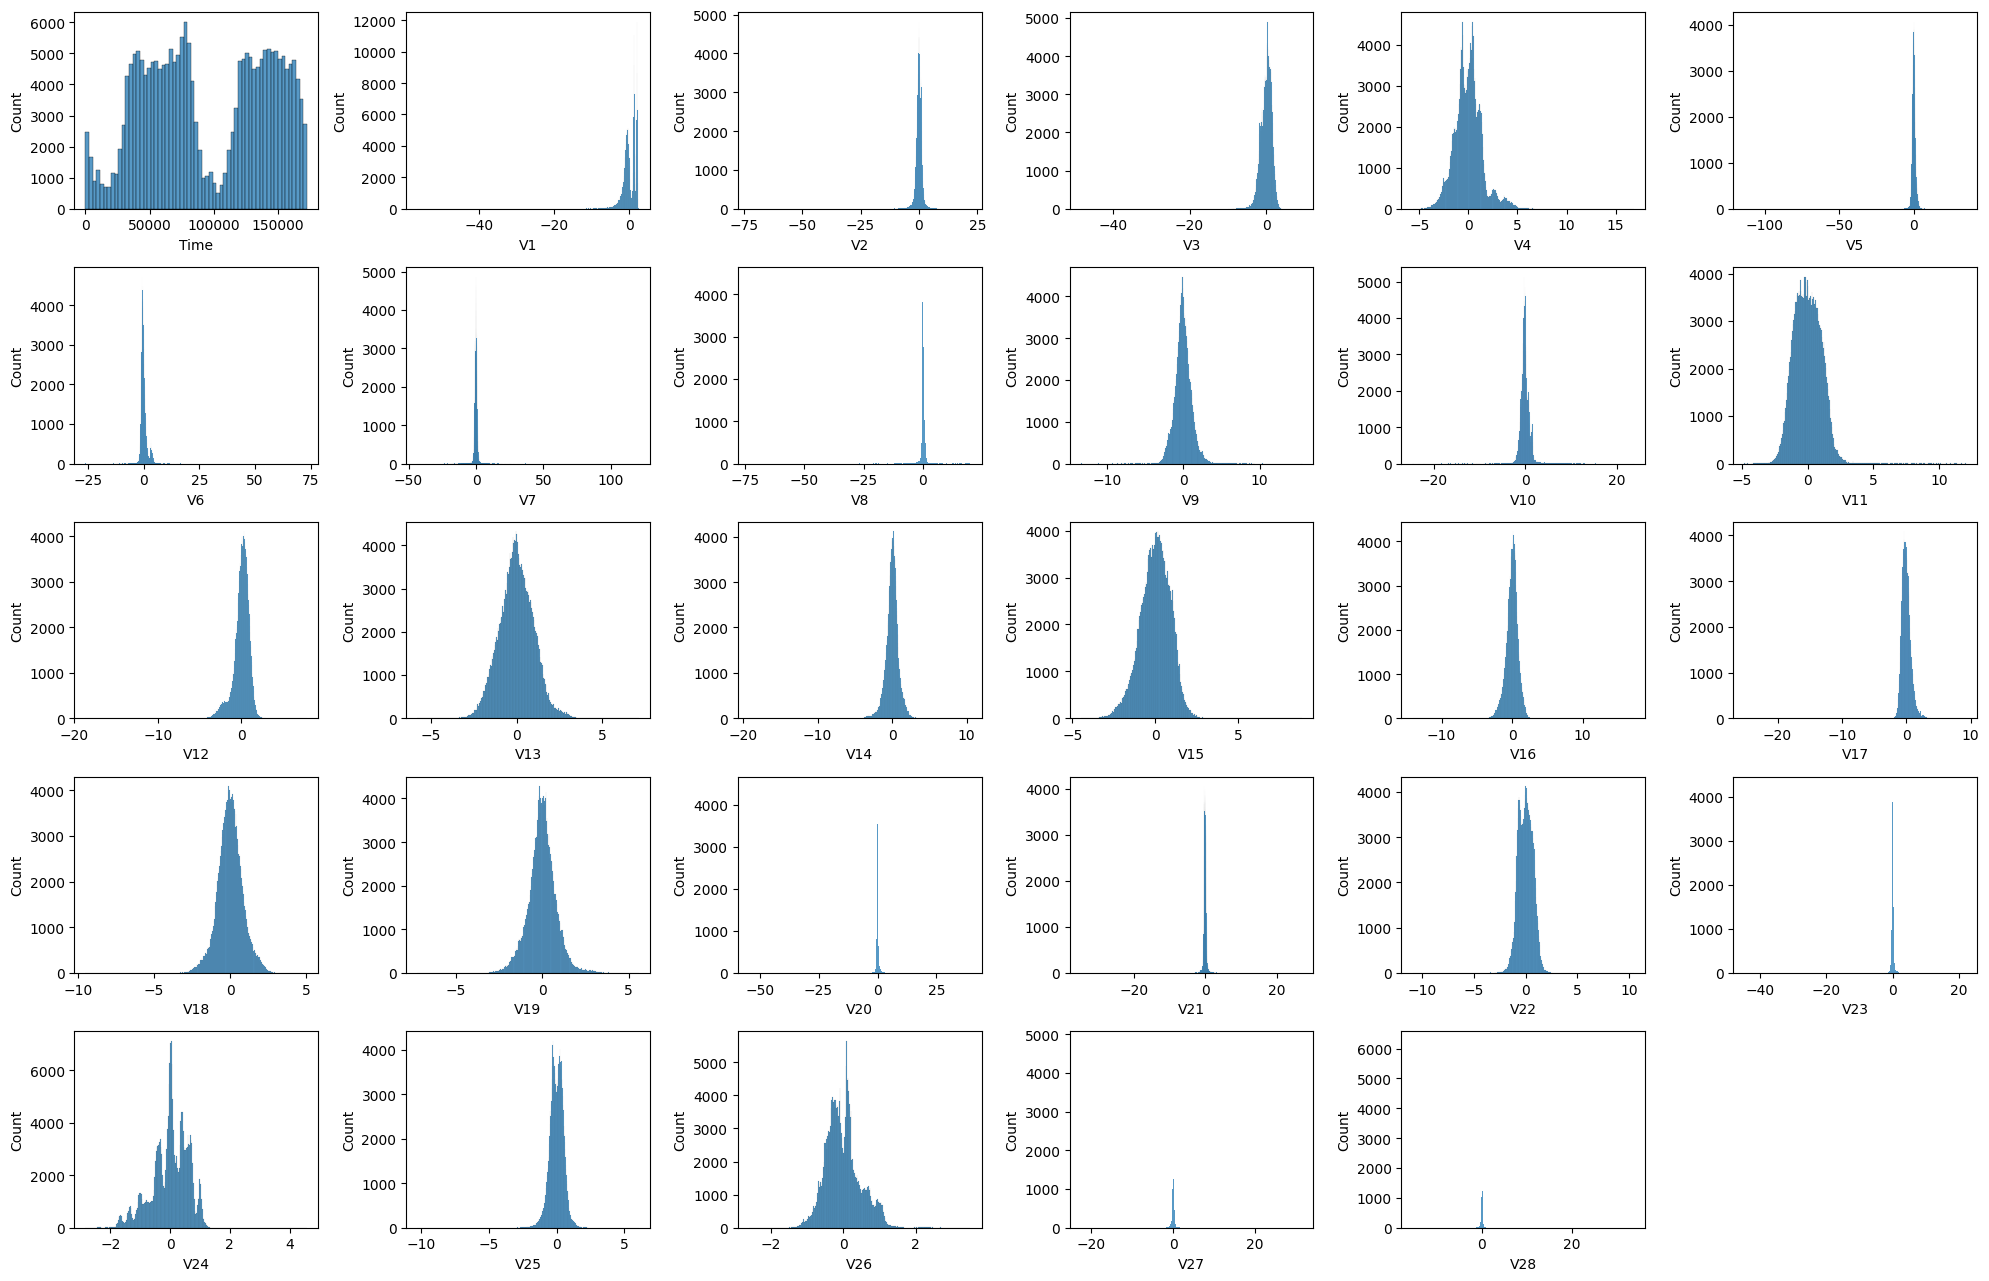

In [ ]:
# plot the histogram of a variable from the dataset
plt.figure(figsize=(20, 15))
for i in range(1, 30):
    plt.subplot(6, 6, i)
    sns.histplot(X_train.iloc[:, i-1])
plt.tight_layout()
plt.show(block=False)

In [ ]:
# Skewness in data to filter the values which are beyond
# -0.5 and +0.5 to calculate skewness in a variable
skewness = df.skew()
# Subset of columns  with below condition
columns = skewness[(skewness < -0.5) | (skewness > 0.5)].index
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12',
       'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V24', 'V26', 'V27', 'V28',
       'Amount'],
      dtype='object')

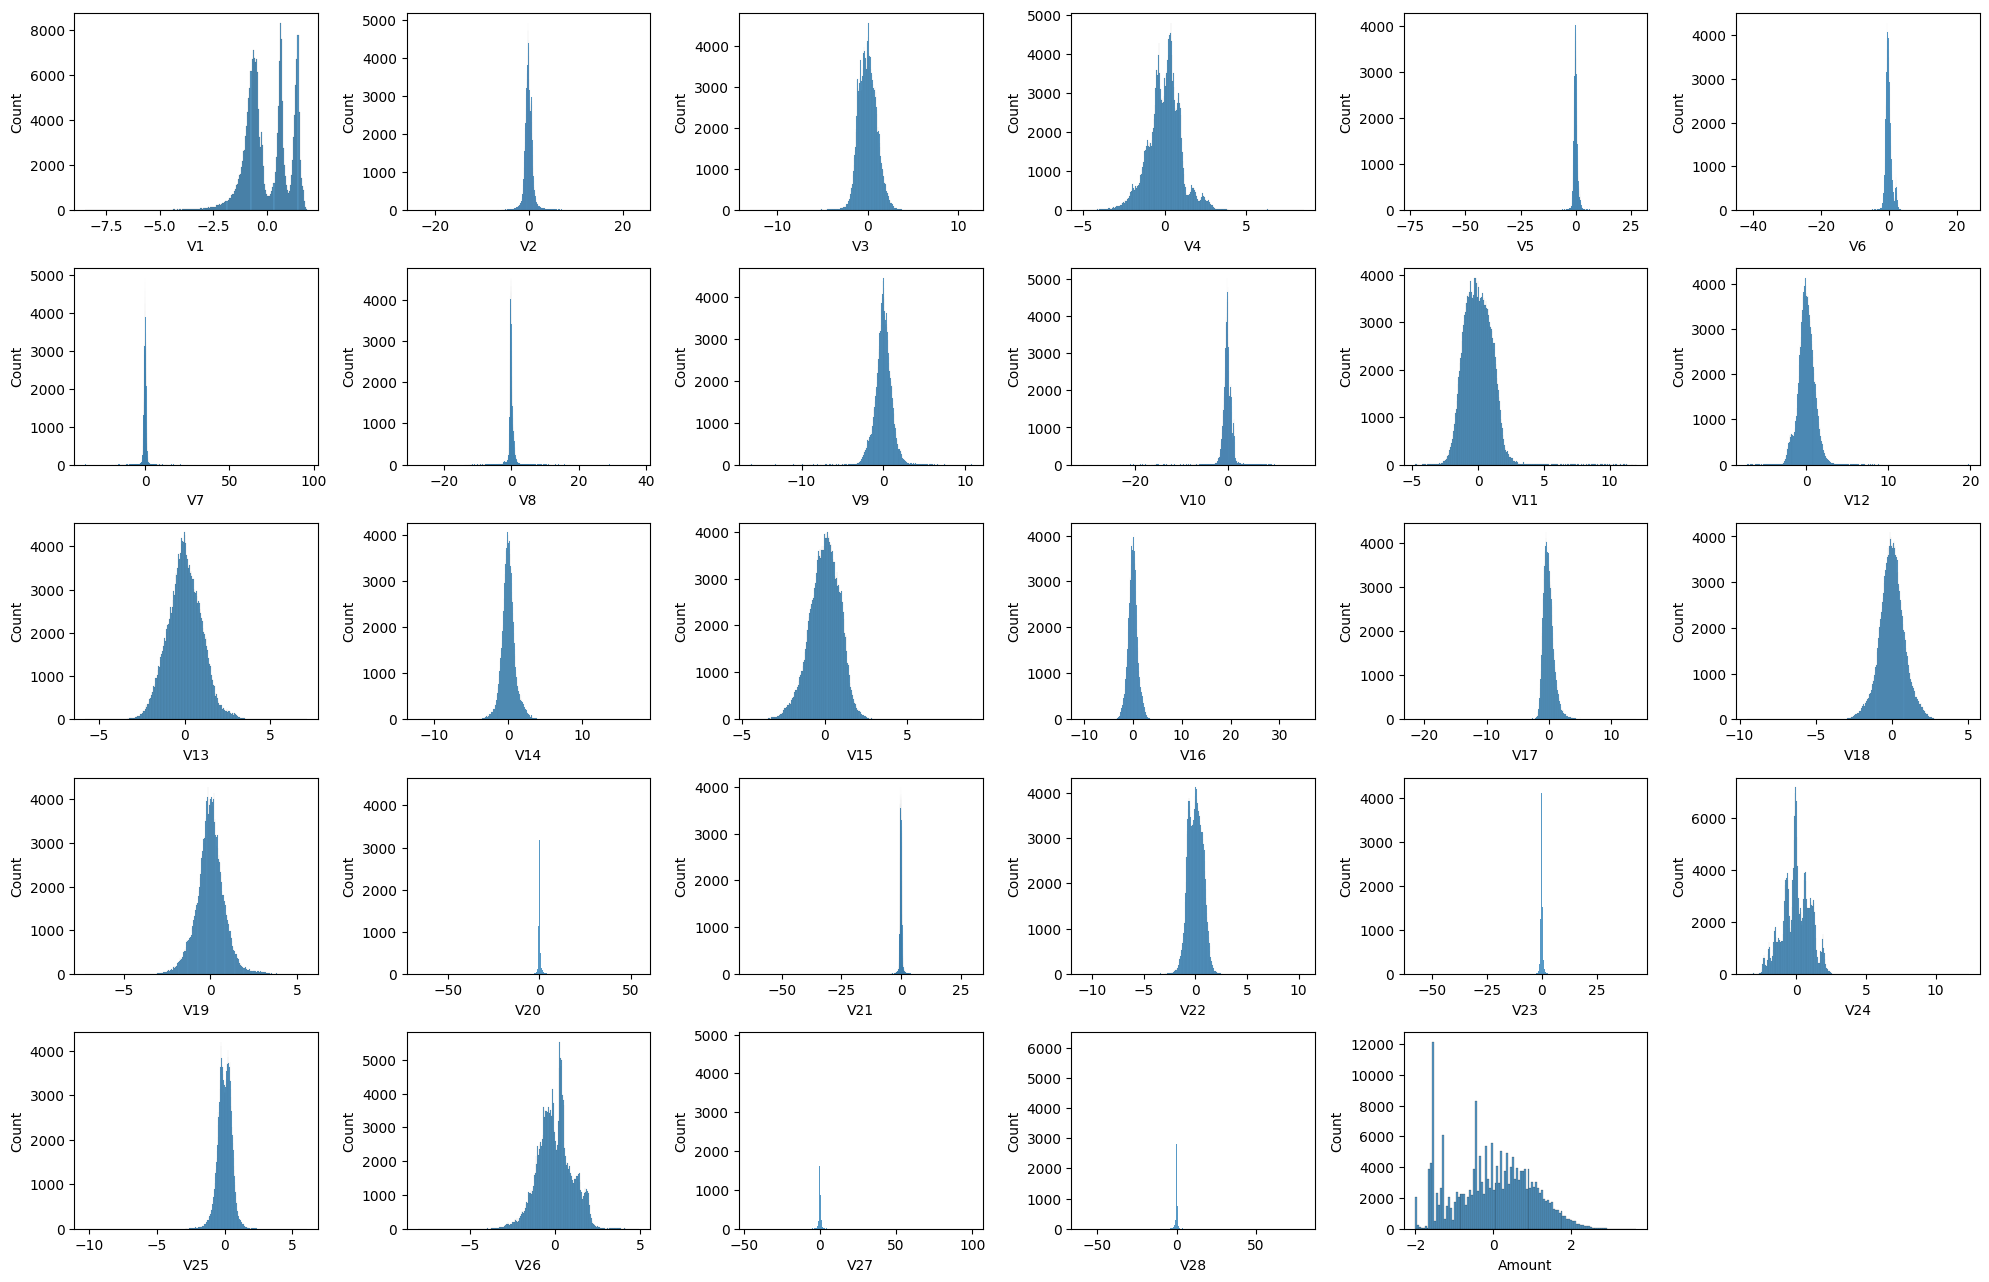

In [ ]:
# Using PowerTransformer for Apply a power transform featurewise to make
# data more Gaussian-like for both X_train and X_test
power = PowerTransformer()
X_train[columns] = power.fit_transform(X_train[columns])
X_test[columns] = power.fit_transform(X_test[columns])
# plot the histogram of a variable from the dataset after power transformation
plt.figure(figsize=(20, 15))
for i in range(1, 30):
    plt.subplot(6, 6, i)
    sns.histplot(X_train.iloc[:, i-1])
plt.tight_layout()
plt.show(block=False)

In [ ]:
# creating a results dataframe for later to evaluate the models
results = pd.DataFrame(columns = ['model_name', 'threshold', 'recall', 'roc_auc_score'])

In [ ]:
def model_evaluation(y_pred_proba_test):
#     Report for different thresholds
    thresholds = [i * 0.1 for i in range(0, 10)]
    print("----------------------------Results----------------------------")
#     best ROC score initialisation
    best_roc_score = 0

#     Iterating through every threshold from 0.1 to 0.9
    for threshold in thresholds:
        y_pred = np.where(y_pred_proba_test[:, 1] > threshold, 1, 0)
#   Calculating different metrics
        accuracy = str(round(metrics.accuracy_score(y_test, y_pred), 3))
        precision = str(round(metrics.precision_score(y_test, y_pred), 3))
        recall = str(round(metrics.recall_score(y_test, y_pred), 3))
        roc_auc = str(round(metrics.roc_auc_score(y_test, y_pred), 3))
#   Setting the best roc score, threshold, recall scores.
        if float(roc_auc) > best_roc_score:
            best_roc_score = float(roc_auc)
            best_threshold = threshold
            best_recall_score = recall
#   printing the results for every threshold
        print("----------for Test with threshold", round(threshold, 2), "----------")
        print("accuracy\tprecision\trecall\t\troc_auc")
        print("\t\t".join([accuracy, precision, recall, roc_auc]))
        print("\n")
#   Confusion Matrix
        print("\t\tCONFUSION MATRIX")
        confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                                        columns=['Predicted Negative', 'Predicted Positive'],
                                        index=['Actual Negative', 'Actual Positive'])
        print(confusion_matrix)
        print("\n")
    print("BEST ROC AUC SCORE is ", best_roc_score, "at the threshold", best_threshold)
    return best_roc_score, best_threshold, best_recall_score

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
# Initial model
logit = LogisticRegression()
# Folds for crossvalidation
cv = KFold(3)
# Setting paramters
param_grid={
    'solver':['saga', 'lbfgs']
}
# Grid search for running model with every possible combimnation
# that is defined with above param_grid
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

# Taking the best estimator and fitting data
best_logit = grid.best_estimator_
best_logit.fit(X_train, y_train)

# Taking probabilities for model evaluation with different thresholds
y_pred_proba_test = best_logit.predict_proba(X_test)
# Model Evaluation
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION IMB', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results,data], ignore_index=False)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
BEST GRID SCORE 0.9823196133356049
BEST GRID PARAMS
{'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.75		0.805		0.902


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71046                  33
Actual Positive                  24                  99


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.85		0.78		0.89


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative       

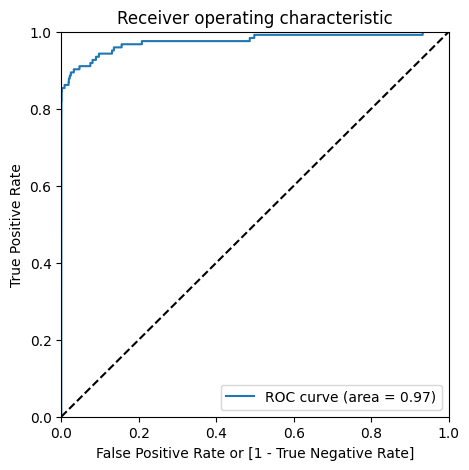

In [29]:
draw_roc(y_test, y_pred_proba_test[:, 1])

higher the area under the curve , higher the score

In [30]:
dt = DecisionTreeClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'criterion':['entropy'],
    'max_depth':[5, 10],
    'min_samples_leaf':[100],
    'min_samples_split': [50]
}
grid = GridSearchCV(dt,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_dt = grid.best_estimator_
best_dt.fit(X_train, y_train)

y_pred_proba_test = best_dt.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['DECISION TREE', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results, data], ignore_index=False)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
BEST GRID SCORE 0.9539098300852643
BEST GRID PARAMS
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.998		0.513		0.821		0.91


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               70983                  96
Actual Positive                  22                 101


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.998		0.513		0.821		0.91


		CONFUSION MATRIX
    

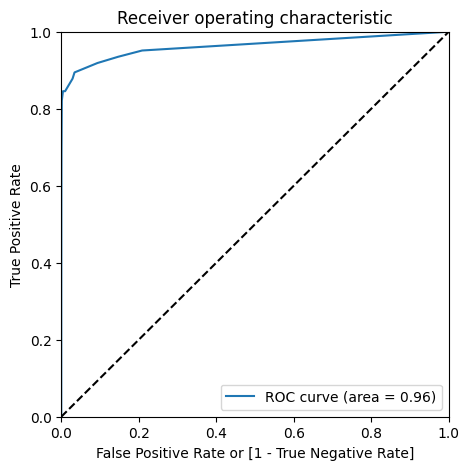

In [31]:
draw_roc(y_test, y_pred_proba_test[:, 1])


Top var = 17
2nd Top var = 14
3rd Top var = 4


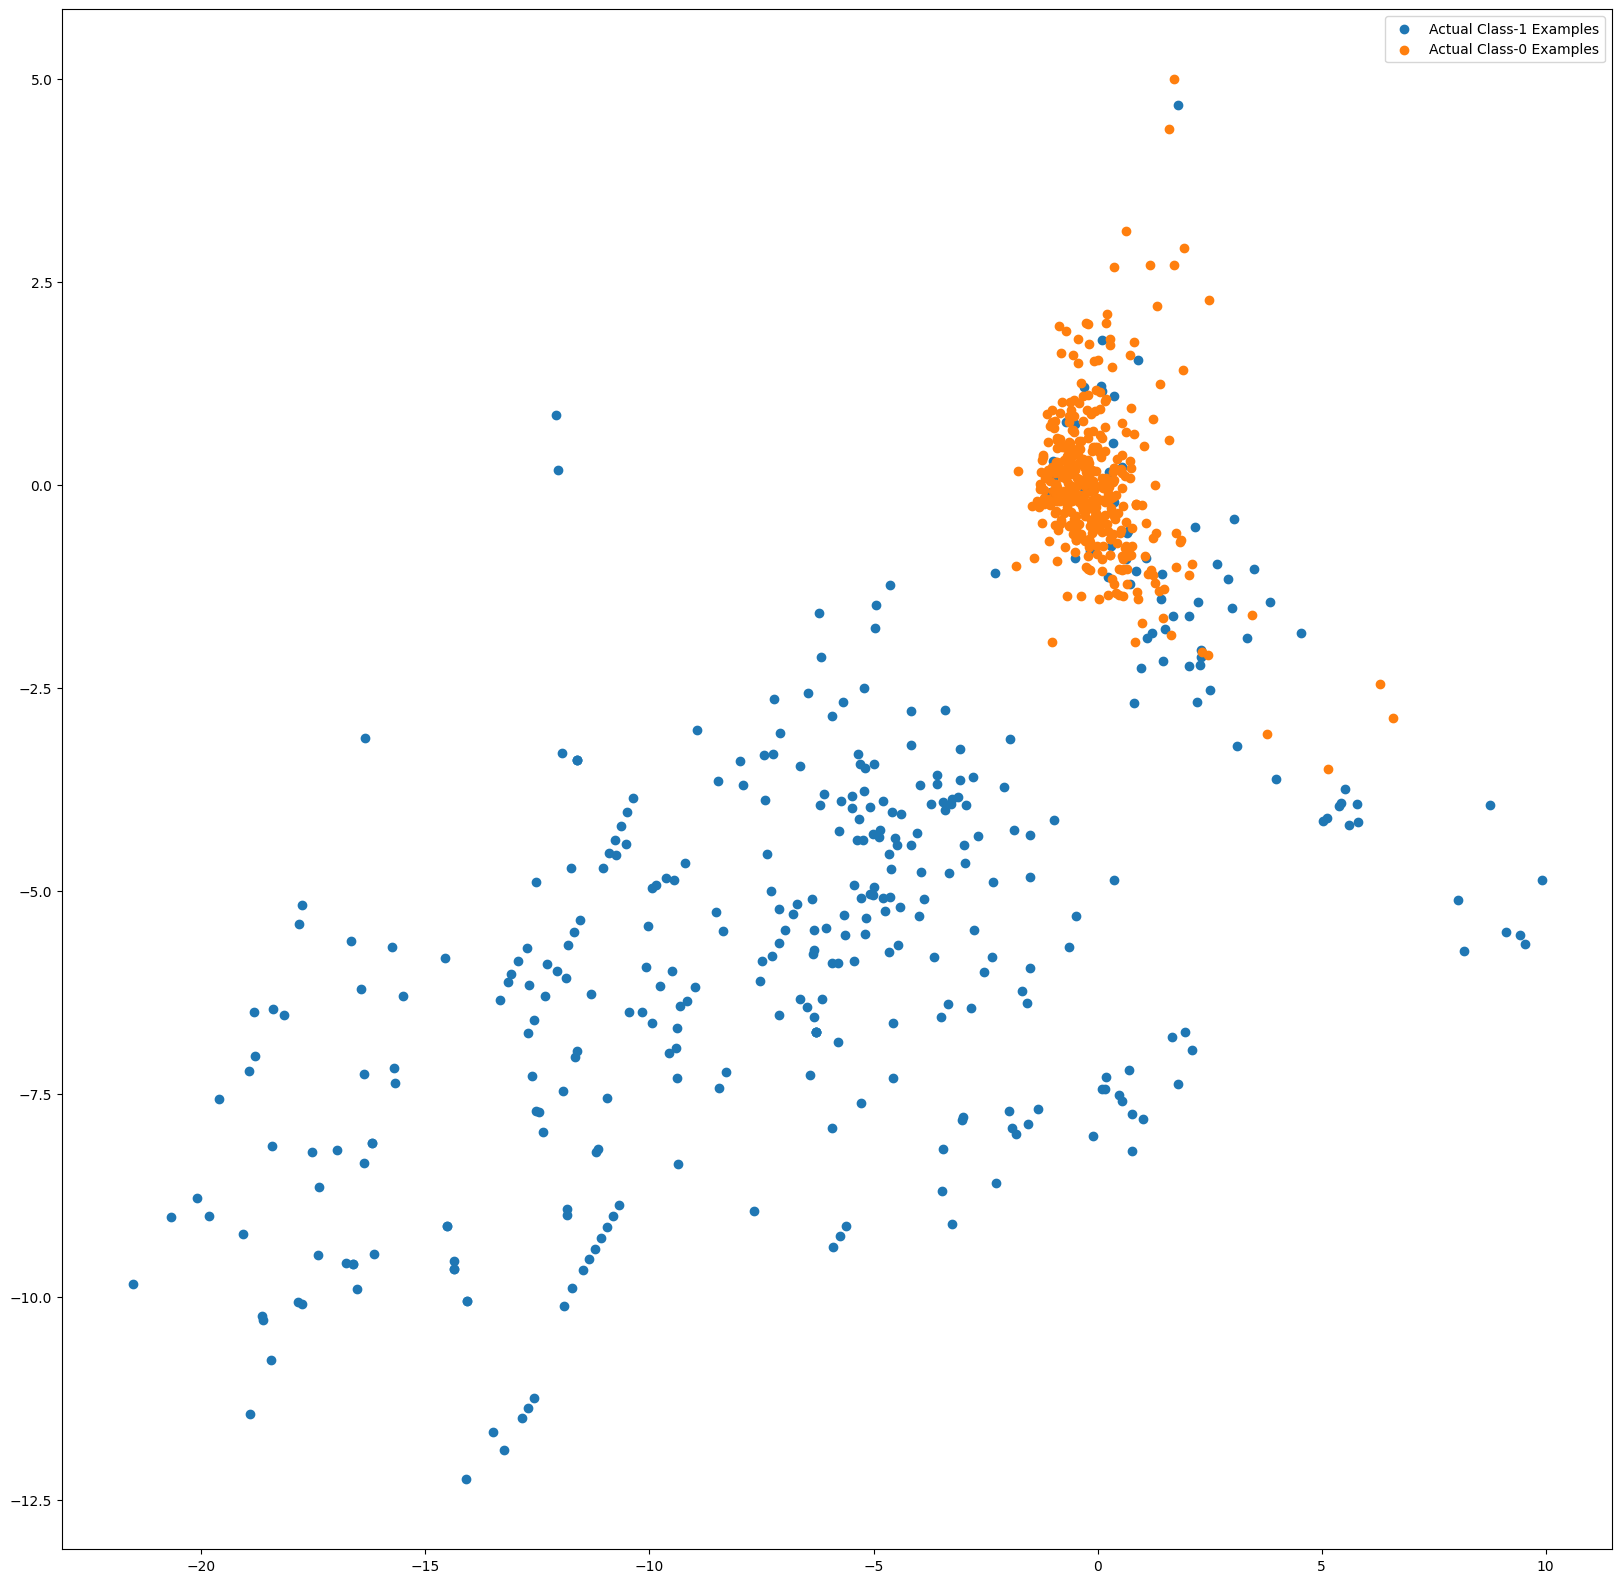

In [32]:
var_imp = []
for i in best_dt.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(best_dt.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(best_dt.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(best_dt.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(best_dt.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(best_dt.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [33]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X_train, y_train)
y_over.value_counts()

,count
Class,
0,213236
1,213236


In [34]:
logit = LogisticRegression()
cv = KFold(3)
param_grid={
    'solver':['saga', 'lbfgs']
}
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_logit = grid.best_estimator_
best_logit.fit(X_over, y_over)

y_pred_proba_test = best_logit.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION OVERSAMPLING', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results, data], ignore_index=False)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
BEST GRID SCORE 0.9823532662311475
BEST GRID PARAMS
{'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.821		0.009		0.951		0.886


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               58354               12725
Actual Positive                   6                 117


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.906		0.017		0.927		0.916


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative   

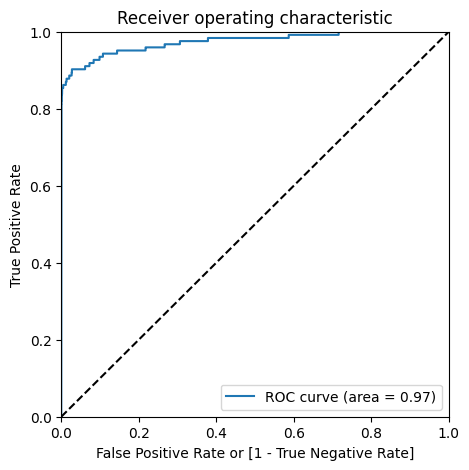

In [35]:
draw_roc(y_test, y_pred_proba_test[:, 1])

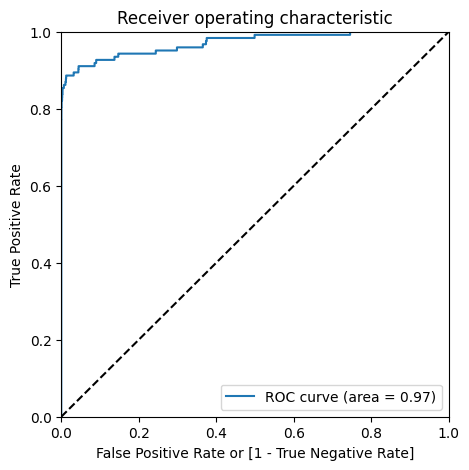

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

In [36]:
sm = ADASYN()
X_adasyn, y_adasyn = sm.fit_resample(X_train, y_train)

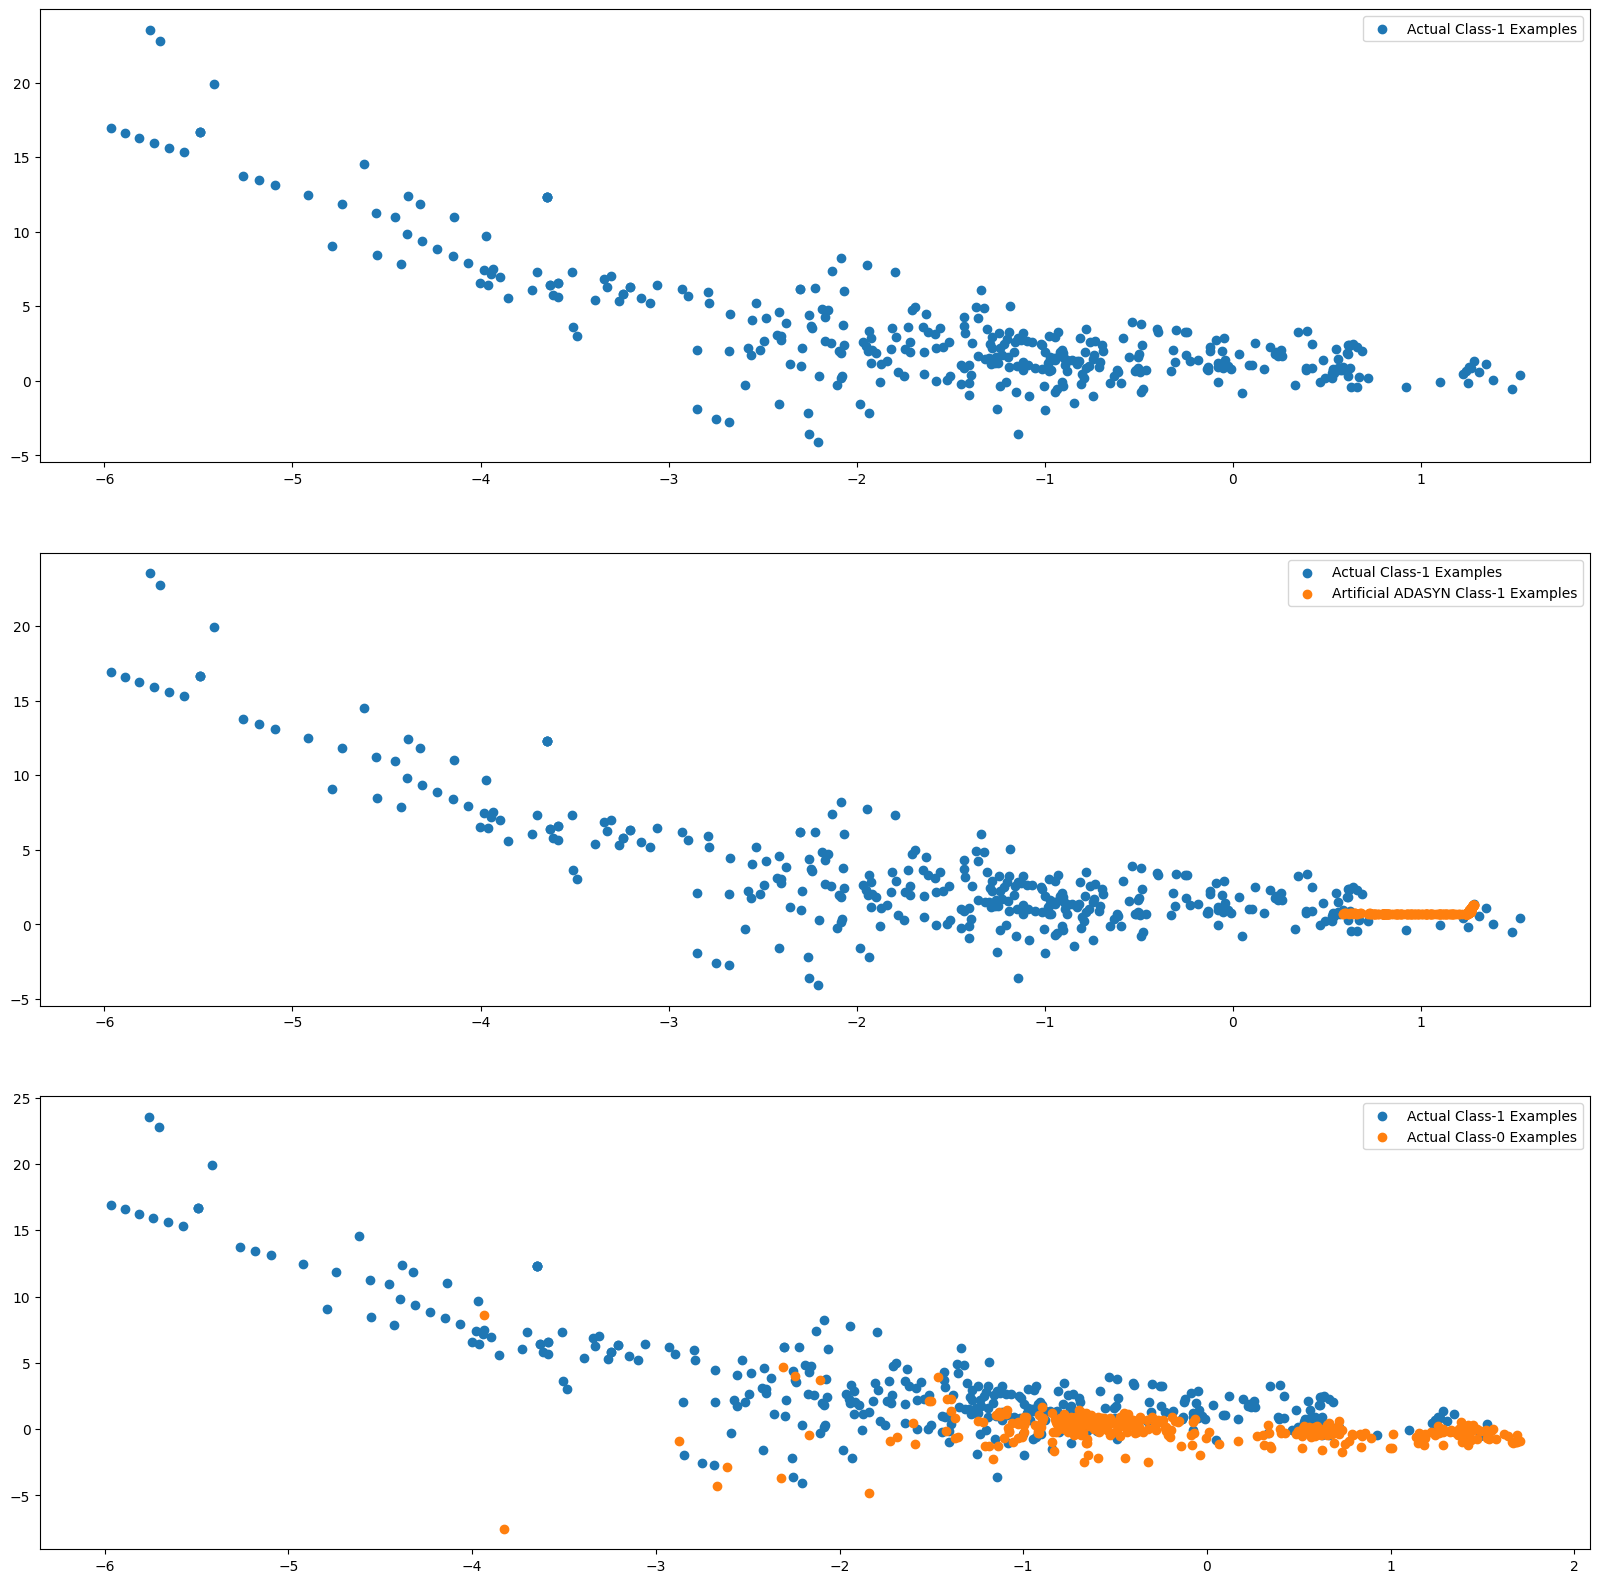

In [37]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [38]:
logit = LogisticRegression()
cv = KFold(3)
param_grid={
    'solver':['saga', 'lbfgs'],
    'C':[0.01, 0.1, 1, 10]
}
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_logit = grid.best_estimator_
best_logit.fit(X_adasyn, y_adasyn)

y_pred_proba_test = best_logit.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION ADASYN', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results, data], ignore_index=False)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
BEST GRID SCORE 0.982398879549732
BEST GRID PARAMS
{'C': 0.01, 'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.638		0.005		0.976		0.806


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               45280               25799
Actual Positive                   3                 120


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.771		0.007		0.967		0.869


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual 

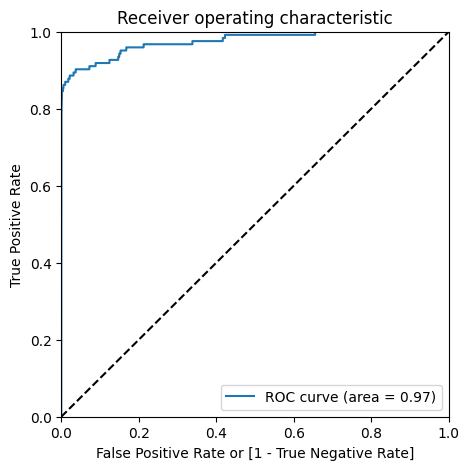

In [39]:
draw_roc(y_test, y_pred_proba_test[:, 1])

In [40]:
dt = DecisionTreeClassifier()
cv = KFold(3)
param_grid={
    'criterion':['entropy'],
    'max_depth':[10],
    'min_samples_leaf':[200, 300],
    'min_samples_split': [20, 50]
}
grid = GridSearchCV(dt,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_dt = grid.best_estimator_
best_dt.fit(X_adasyn, y_adasyn)

y_pred_proba_test = best_dt.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['DECISION TREE ADASYN', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results, data], ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9458978051516361
BEST GRID PARAMS
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 300, 'min_samples_split': 50}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.911		0.018		0.927		0.919


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               64779                6300
Actual Positive                   9                 114


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.933		0.023		0.919		0.926


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               66316                4763
Actual Positive                  10                 113


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.942		0.026		0.894		0.918


		CONFUSION MAT

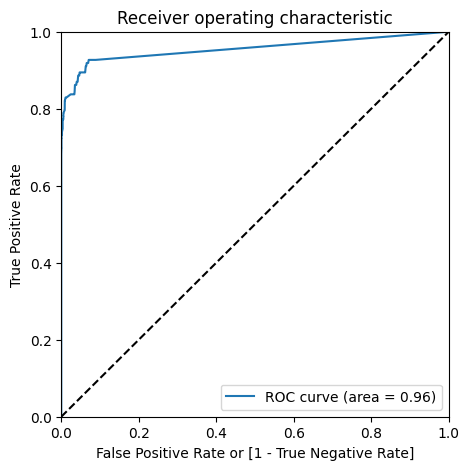

In [41]:
draw_roc(y_test, y_pred_proba_test[:, 1])

Top var = 14
2nd Top var = 4
3rd Top var = 12


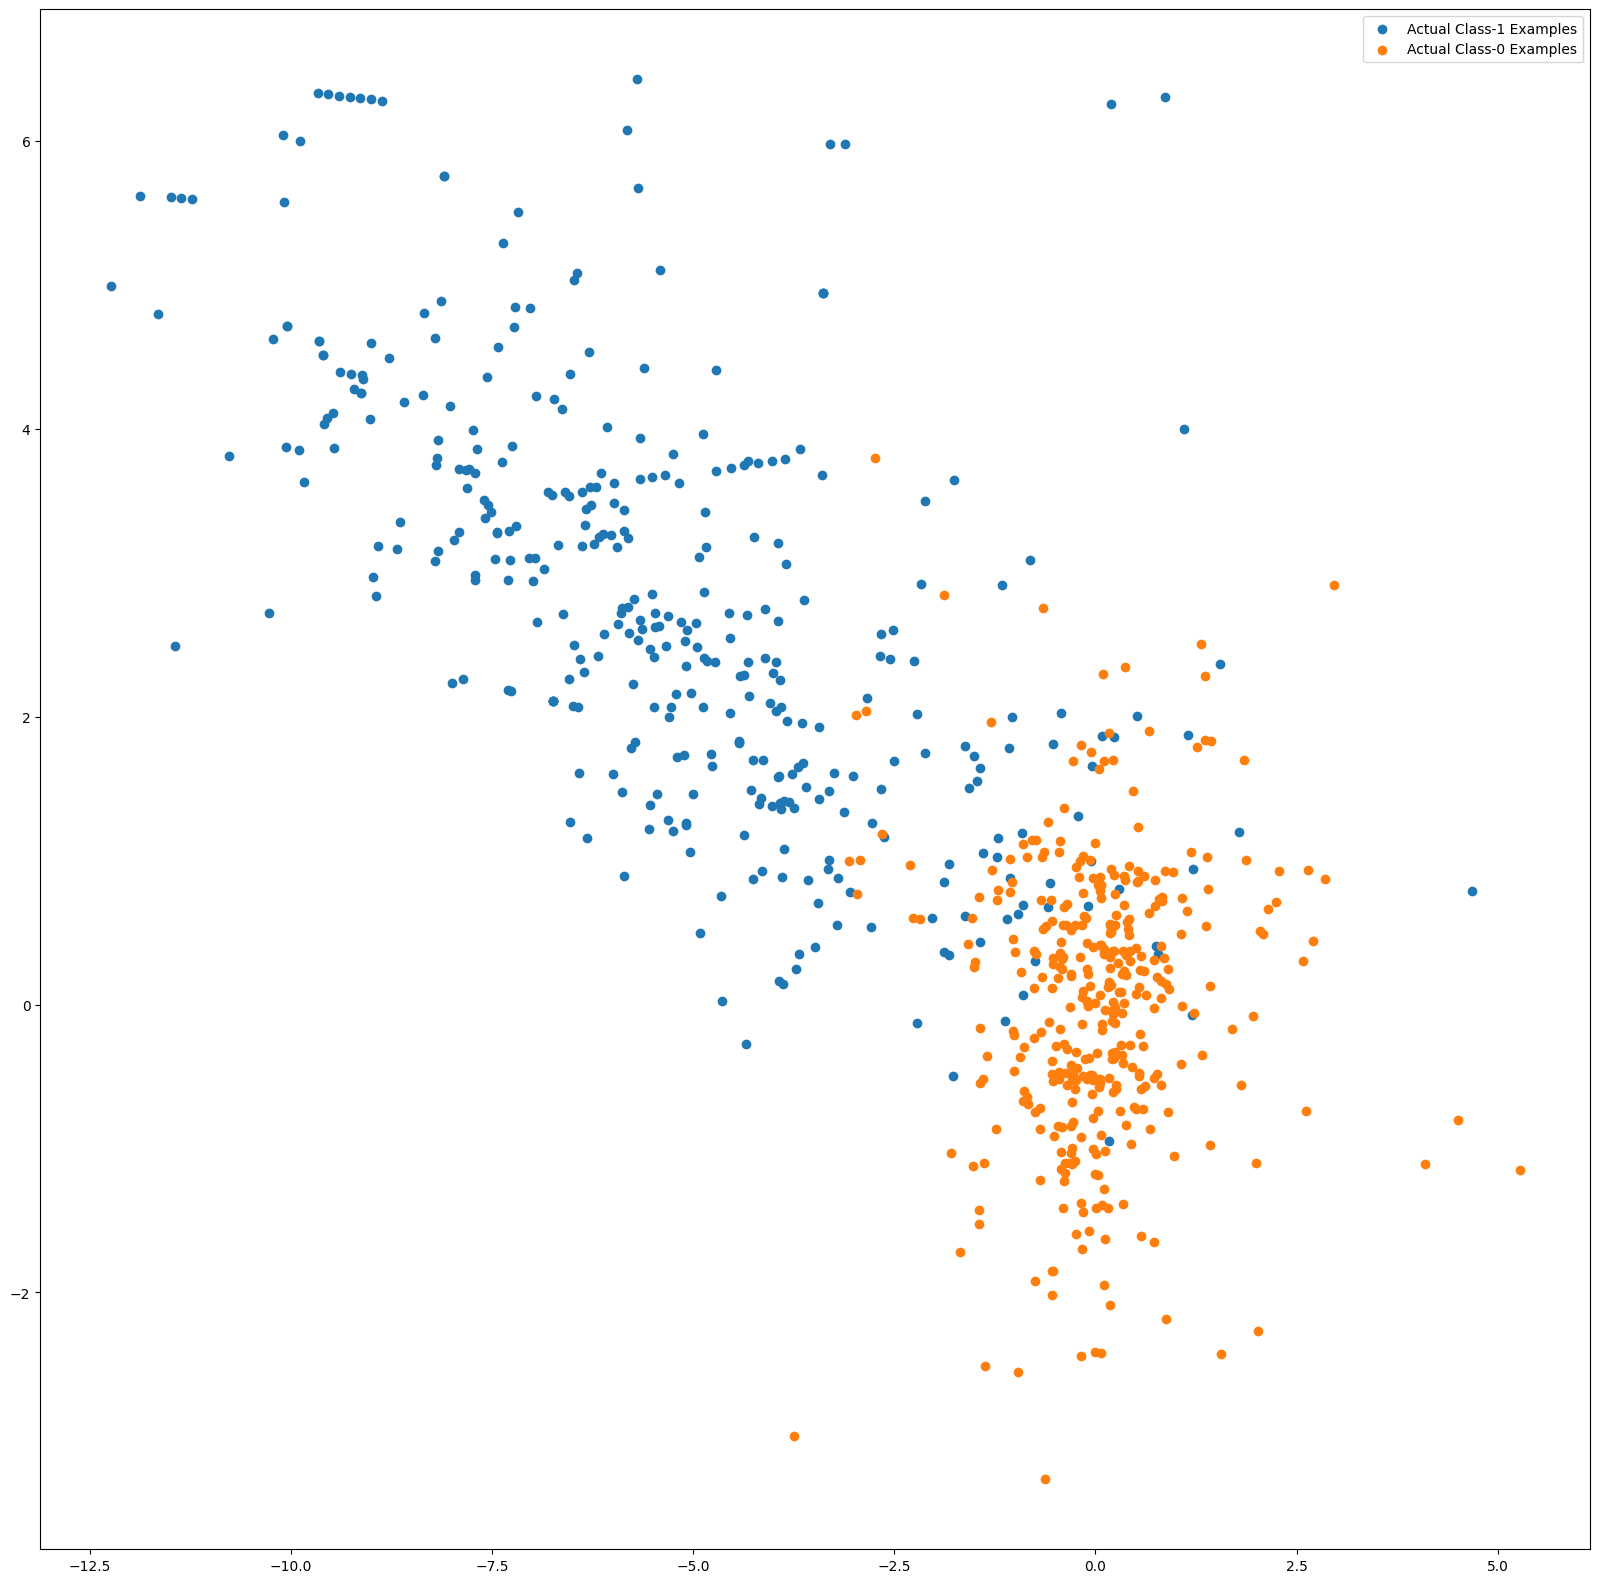

In [42]:
var_imp = []
for i in best_dt.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(best_dt.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(best_dt.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(best_dt.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(best_dt.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(best_dt.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [43]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X_train, y_train)
y_over.value_counts()

,count
Class,
0,213236
1,213236


In [44]:
logit = LogisticRegression()
cv = KFold(3)
param_grid={
    'solver':['saga', 'lbfgs']
}
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_logit = grid.best_estimator_
best_logit.fit(X_over, y_over)

y_pred_proba_test = best_logit.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION OVERSAMPLING', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results, data], ignore_index=False)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
BEST GRID SCORE 0.9823396271997086
BEST GRID PARAMS
{'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.821		0.009		0.951		0.886


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               58354               12725
Actual Positive                   6                 117


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.906		0.017		0.927		0.916


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative   

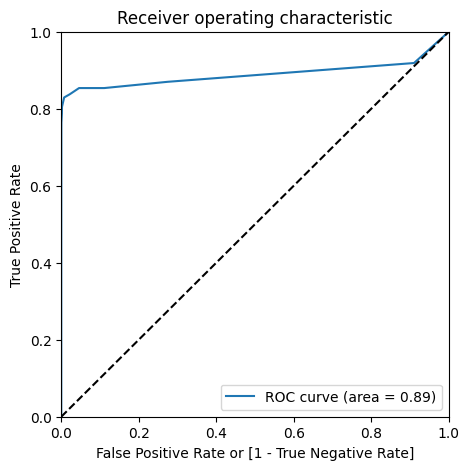

In [46]:
draw_roc(y_test, y_pred_proba_test[:, 1])

In [45]:
dt = DecisionTreeClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'criterion':['entropy'],
    'max_depth':[5, 10],
    'min_samples_leaf':[50],
    'min_samples_split': [25, 50]
}
grid = GridSearchCV(dt,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_dt = grid.best_estimator_
best_dt.fit(X_over, y_over)

y_pred_proba_test = best_dt.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['DECISION TREE OVERSAMPLING', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results, data], ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.955559993639817
BEST GRID PARAMS
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 25}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.091		0.002		0.919		0.504


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                6375               64704
Actual Positive                  10                 113


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.889		0.013		0.854		0.871


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               63198                7881
Actual Positive                  18                 105


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.922		0.019		0.854		0.888


		CONFUSION MATRIX

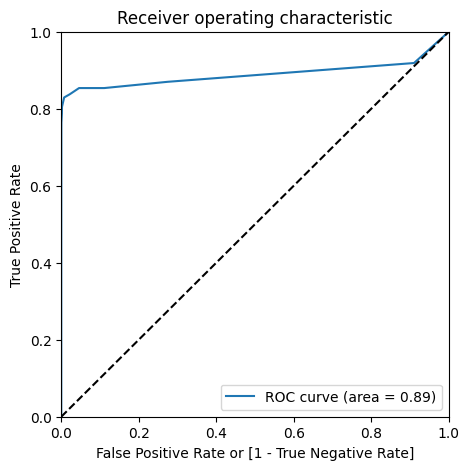

In [47]:
draw_roc(y_test, y_pred_proba_test[:, 1])

In [48]:
sm = ADASYN()
X_adasyn, y_adasyn = sm.fit_resample(X_train, y_train)

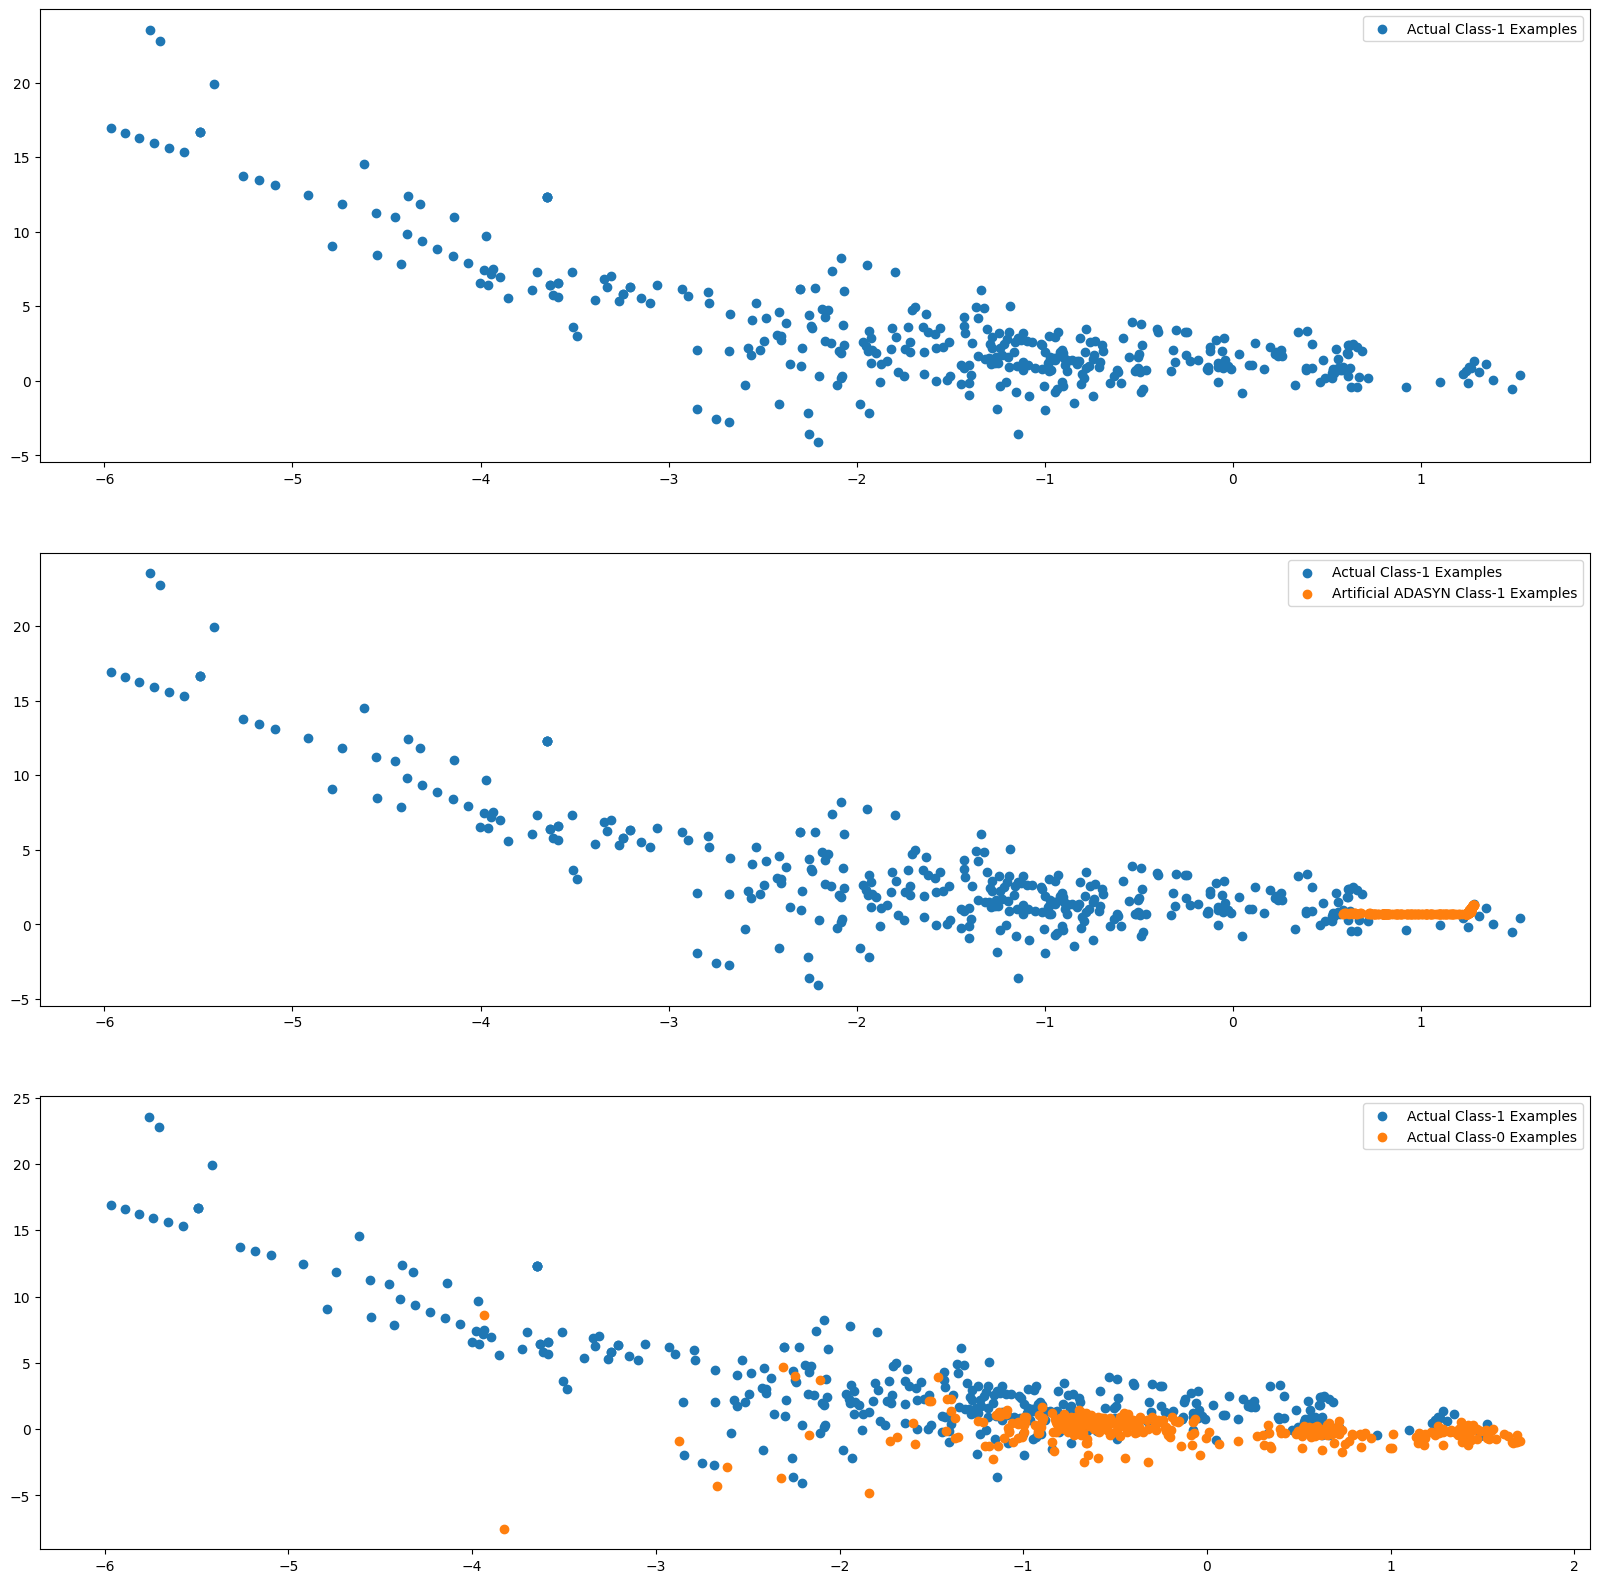

In [49]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [50]:
logit = LogisticRegression()
cv = KFold(3)
param_grid={
    'solver':['saga', 'lbfgs'],
    'C':[0.01, 0.1, 1, 10]
}
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_logit = grid.best_estimator_
best_logit.fit(X_adasyn, y_adasyn)

y_pred_proba_test = best_logit.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION ADASYN', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results, data], ignore_index=False)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
BEST GRID SCORE 0.9824053600079711
BEST GRID PARAMS
{'C': 0.01, 'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.636		0.005		0.976		0.806


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               45167               25912
Actual Positive                   3                 120


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.77		0.007		0.967		0.869


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual 

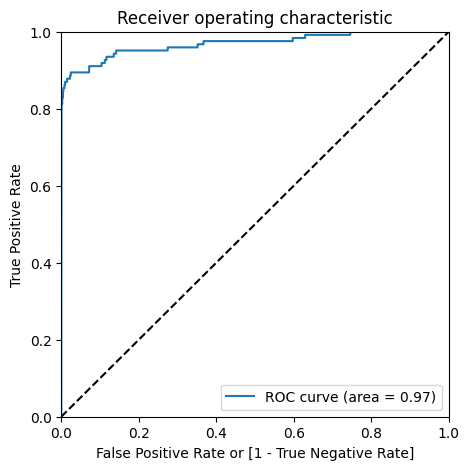

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

In [ ]:
dt = DecisionTreeClassifier()
cv = KFold(3)
param_grid={
    'criterion':['entropy'],
    'max_depth':[10],
    'min_samples_leaf':[200, 300],
    'min_samples_split': [20, 50]
}
grid = GridSearchCV(dt,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_dt = grid.best_estimator_
best_dt.fit(X_adasyn, y_adasyn)

y_pred_proba_test = best_dt.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['DECISION TREE ADASYN', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = pd.concat([results, data], ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9433041462847944
BEST GRID PARAMS
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 300, 'min_samples_split': 50}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.891		0.014		0.919		0.905


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               63341                7738
Actual Positive                  10                 113


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.957		0.035		0.902		0.93


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               68052                3027
Actual Positive                  12                 111


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.966		0.044		0.902		0.934


		CONFUSION MATR

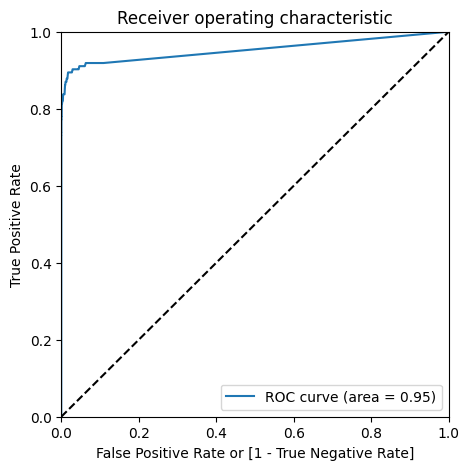

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# ASSINGMENT

**SMOT**

In [62]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verify the resampled data
print("Original dataset shape:", {X_train.shape[0]: y_train.value_counts().to_dict()})
print("Resampled dataset shape:", {X_resampled.shape[0]: pd.Series(y_resampled).value_counts().to_dict()})


Original dataset shape: {213605: {0: 213236, 1: 369}}
Resampled dataset shape: {426472: {0: 213236, 1: 213236}}


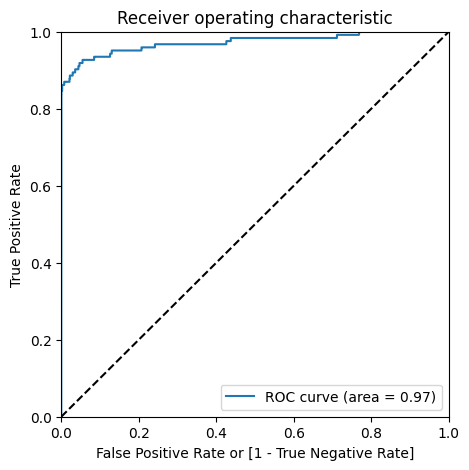

In [64]:
draw_roc(y_test, y_pred_proba_test[:, 1])

**Random forest**

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Fit the model directly without hyperparameter tuning
rf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_proba_test = rf.predict_proba(X_test)
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)

# Store the results
data = pd.DataFrame([['RANDOM FOREST', best_threshold, best_recall_score, best_roc_score]], columns=results.columns)
results = pd.concat([results, data], ignore_index=True)

# Print results
print(results)


----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   1               71078
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.727		0.846		0.922


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71040                  39
Actual Positive                  19                 104


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.811		0.837		0.919


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71055                  24
Actual Positive                  20                 103


----------for Test with threshold 

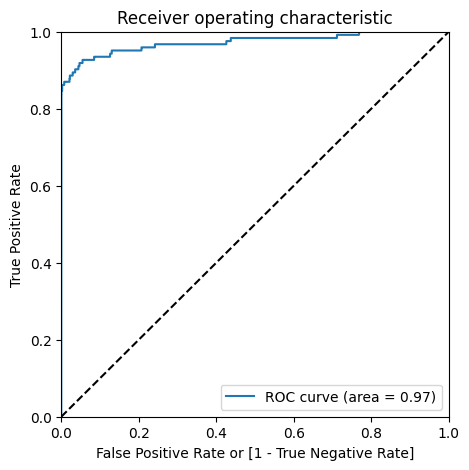

In [58]:
draw_roc(y_test, y_pred_proba_test[:, 1])

**XG BOOST**

In [59]:
from xgboost import XGBClassifier
import pandas as pd

# XGBoost Classifier
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Make predictions and evaluate the XGBoost model
y_pred_proba_test_xgb = xgb.predict_proba(X_test)
best_roc_score_xgb, best_threshold_xgb, best_recall_score_xgb = model_evaluation(y_pred_proba_test_xgb)

# Store the XGBoost results
data_xgb = pd.DataFrame([['XGBOOST', best_threshold_xgb, best_recall_score_xgb, best_roc_score_xgb]], columns=results.columns)
results = pd.concat([results, data_xgb], ignore_index=True)

# Print results
print(results)


----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.808		0.821		0.91


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71055                  24
Actual Positive                  22                 101


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.867		0.797		0.898


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71064                  15
Actual Positive                  25                  98


----------for Test with threshold 0

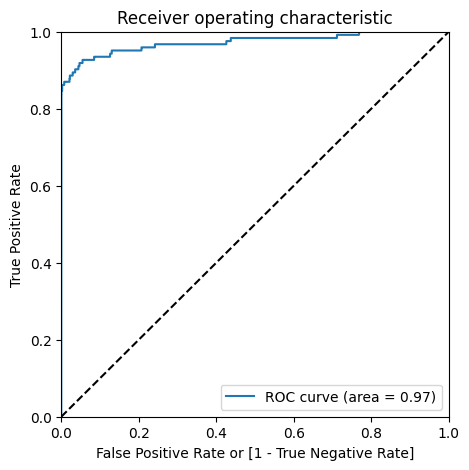

In [60]:
draw_roc(y_test, y_pred_proba_test[:, 1])

In [63]:
results.sort_values("recall", ascending=False, inplace=True)
# results.to_csv("results.csv", index = False) #for saving the data frame to csv file
results

,model_name,threshold,recall,roc_auc_score
0,DECISION TREE ADASYN,0.1,0.919,0.926
1,LOGISTIC REGRESSION OVERSAMPLING,0.4,0.902,0.932
2,LOGISTIC REGRESSION ADASYN,0.7,0.902,0.930
3,LOGISTIC REGRESSION OVERSAMPLING,0.4,0.902,0.932
4,LOGISTIC REGRESSION ADASYN,0.7,0.902,0.930
8,RANDOM FOREST,0.1,0.846,0.922
5,DECISION TREE OVERSAMPLING,0.6,0.829,0.911
6,DECISION TREE,0.1,0.821,0.910
9,XGBOOST,0.1,0.821,0.910
7,LOGISTIC REGRESSION IMB,0.1,0.805,0.902
